<a href="https://colab.research.google.com/github/wguesdon/BrainPost_google_analytics/blob/master/Report_v01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Presentation

## About BrainPost

Kasey Hemington runs BrainPost with a fellow PhD friend, Leigh Christopher as a way to keep in touch with her scientific roots while working as a data scientist! Every Tuesday since we started in early 2018, we publish our e-newsletter which is three short summaries of new neuroscience studies that have just come out. After publishing on our website each Tuesday, we typically post on Twitter (@brainpostco) and Facebook (@brainpostco) once to announce the release of the e-newsletter and three times (once for each of the three summaries) to highlight each summary. There are a few exceptions to our publishing schedule. Sometimes we post extra articles here: https://www.brainpost.co/brainpost-life-hacks, and also a few weeks we've only been able to publish two summaries instead of three.  At around the same time as we publish the e-newsletter on the website each Tuesday, we also send it to our ~1700 email subscribers directly (via mailchimp).

## About the Challenge

We're always wondering if we should change what type of content we're publishing, and how people are finding us. From some small surveys we've done for example, we find people would be interested in more casual/applicable to daily life content (like we publish on this tab https://www.brainpost.co/brainpost-life-hacks) than more technical summaries of complex articles, but we also aren't really sure if that's just a subgroup of people who get the e-newsletter to their email inbox filling out the survey. We also might have two audiences - academics and non-academics (?) who like different things.

## About the data

In the remaining tabs of this workbook there is weekly pageview data for each page on the website (I think..according to our google analytics). Each tab represents pageview data for two one week periods, split up by the page name/URL and the source/medium (first two columns). My general idea was people can look at the data at a weekly cadence and figure out stats about different pages/content, BUT with google analytics a huge problem is that it doesn't really take into account that different content is published on different days (for example, a stat about 'only 2 pageviews' to a page is meaningless to me if it is because the page was only published an hour ago). Our content is published weekly so it should approximately match that I extracted the data weekly. My apologies for the formatting... Google analytics was a nightmare to extract from - a very manual process. But, I guess data cleaning is a part of the process! So, we've been publishing ~3 new pages a week since 2018, but I've only included data starting in July 2020 because the data extraction process is so manual. The date of publication can be extracted from the URL.

We've noticed some pages seem really popular possibly for strange reasons (maybe they come up on the first page of google because people are searching for something really similar?) and those anomalies might not reflect what people like overall about the site.

There is also a tab with a page (URL) to page title lookup

## The questions we'd like to ask

What content (or types of content) is most popular (what are patterns we see in popular content) and is different content popular amongst different subgroups (e.g. by source/medium)?

Any question that will help us to take action to better tailor our content to our audience(s) or understand how traffic comes to the site.

Where are people visiting from (source-wise)?

## How this challenge works:

Just like the last challenge, you can submit an entry by posting a github link to your analysis on the signup page (second tab). Use any combination of reports/visuals/code/presentation you think is best - just make sure your code is accessible!

Let's have a few days for people to review the data and ask any questions and then we can discuss what everyone thinks is a reasonable deadline/timeline and set the timeline from there. If you have any further data requests you think would help answer the questions I might be able to get it (google analytics or mailchimp).

After the deadline I'll choose the first and second place submission. The criteria will be whatever submission provides the most compelling evidence that gives me a clear idea of what actions we could take next to improve the site.

# Initialize

In [ ]:
# Load libraries
# https://stackoverflow.com/questions/58667299/google-colab-why-matplotlib-has-a-behaviour-different-then-default-after-import
# Panda profilling alter seaborn plotting style

from google.colab import drive # to load data from google drive
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
%matplotlib inline
import math # calculation

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


# Data Cleaning

In [ ]:
# Load the Pages Titles
pages_tiltes = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', sheet_name='Page to Page Title lookup', skiprows=6)

In [ ]:
# Load the content-pages oct 4-17
# Skip the first 6 rows with headers
# Skip the last 18 rows with total view
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
# See https://stackoverflow.com/questions/49876077/pandas-reading-excel-file-starting-from-the-row-below-that-with-a-specific-valu

#content-pages july 12-25
july12_25 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages july 12-25', 
                        skiprows=6, skipfooter=20)
#july12_25

#content-pages jul 26 - aug 8
jul26_aug8 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages jul 26 - aug 8', 
                        skiprows=6, skipfooter=20)
#jul26_aug8

#content-pages aug 9-22
aug9_22 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages aug 9-22', 
                        skiprows=6, skipfooter=20)
#aug9_22

#content-pages aug23-sept5
aug23_sept5 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages aug23-sept5', 
                        skiprows=6, skipfooter=20)
#aug23_sept5

#content-pages sept 6-19
sept6_19 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages sept 6-19', 
                        skiprows=6, skipfooter=20)
#sept6_19

#content-pages sept 20-oct3
sept20_oct3 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages sept 20-oct3', 
                        skiprows=6, skipfooter=20)
#sept20_oct3

#content-pages oct 4-17
Oct4_17 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                        sheet_name='content-pages oct 4-17', 
                        skiprows=6, skipfooter=20)
#Oct4_17

#content-pages oct 18-31
Oct18_31 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages oct 18-31', 
                        skiprows=6, skipfooter=20)
#Oct18_31

# Combine data frame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

frames = [july12_25,
          jul26_aug8,
          aug9_22,
          aug23_sept5,
          sept6_19,
          sept20_oct3,
          Oct4_17,
          Oct18_31]
df = pd.concat(frames)
df

,Page,Source / Medium,Date Range,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Jul 19, 2020 - Jul 25, 2020",0,0,00:00:00,0,0.0000,0.0000,0
1,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Jul 12, 2020 - Jul 18, 2020",1,1,00:00:00,1,1.0000,1.0000,0
2,/weekly-brainpost/tag/neuroinflammation,google / organic,"Jul 19, 2020 - Jul 25, 2020",2,2,00:00:00,2,1.0000,1.0000,0
3,/weekly-brainpost/tag/neuroinflammation,google / organic,"Jul 12, 2020 - Jul 18, 2020",0,0,00:00:00,0,0.0000,0.0000,0
4,/weekly-brainpost/2020/7/7/two-basal-forebrain...,google / organic,"Jul 19, 2020 - Jul 25, 2020",1,1,00:00:00,1,1.0000,1.0000,0
...,...,...,...,...,...,...,...,...,...,...
1537,/,skypeascientist.com / referral,"Oct 18, 2020 - Oct 24, 2020",0,0,00:00:00,0,0.0000,0.0000,0
1538,/,t.co / referral,"Oct 25, 2020 - Oct 31, 2020",3,3,00:00:32,2,0.5000,0.3333,0
1539,/,t.co / referral,"Oct 18, 2020 - Oct 24, 2020",10,6,00:00:10,3,0.3333,0.3000,0
1540,/,yahoo / organic,"Oct 25, 2020 - Oct 31, 2020",0,0,00:00:00,0,0.0000,0.0000,0


In [ ]:
df_outer = pd.merge(df, pages_tiltes, how='outer', on='Page')
df = df_outer.copy()

In [ ]:
# Determine the number of missing values for every column
df.isnull().sum()

Page                    0
Source / Medium        63
Date Range             63
Pageviews              63
Unique Pageviews       63
Avg. Time on Page      63
Entrances              63
Bounce Rate            63
% Exit                 63
Page Value             63
Page Title           4964
dtype: int64

In [ ]:
# Filter entries with Pageviews >= 0
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

df_Pageviews_filtered = df[df['Pageviews'] > 0]
df_Pageviews_filtered.isnull().sum()

Page                    0
Source / Medium         0
Date Range              0
Pageviews               0
Unique Pageviews        0
Avg. Time on Page       0
Entrances               0
Bounce Rate             0
% Exit                  0
Page Value              0
Page Title           2688
dtype: int64

In [ ]:
# Create a value count column
# https://stackoverflow.com/questions/29791785/python-pandas-add-a-column-to-my-dataframe-that-counts-a-variable

df_Pageviews_filtered['Page_count'] = df_Pageviews_filtered.groupby('Page')['Page'].transform('count')
df_Pageviews_filtered['Source_count'] = df_Pageviews_filtered.groupby('Source / Medium')['Source / Medium'].transform('count')
df_Pageviews_filtered['Page_Title_count'] = df_Pageviews_filtered.groupby('Page Title')['Page Title'].transform('count')

df = df_Pageviews_filtered.copy()

In [ ]:
# Merge all facebook
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

# I chose to combine all facebook referal 
# m.facebook indicate mobile trafic. 
# There is no equivalent for the other Source so I will ignnore this for this part of the analysis.

df = df.replace(to_replace = ["l.facebook.com / referral", "m.facebook.com / referral", "facebook.com / referral"],  
                            value = "facebook")
df = df.replace( to_replace = "google / organic", value = "google")
df = df.replace( to_replace = "(direct) / (none)", value = "direct")
# t.co is twitter
# https://analypedia.carloseo.com/t-co-referral/
df = df.replace( to_replace = "t.co / referral", value = "twitter")
df = df.replace( to_replace = "bing / organic", value = "bing")

In [ ]:
# Deal with time data
df['time'] = pd.to_datetime(df['Avg. Time on Page'],  format='%H:%M:%S')
df['time'] = pd.to_datetime(df['time'], unit='s')
df[['time0']] = pd.to_datetime('1900-01-01 00:00:00')
df['time_diff'] = df['time'] - df['time0']
df['time_second'] = df['time_diff'].dt.total_seconds().astype(int)

# Data Visualization

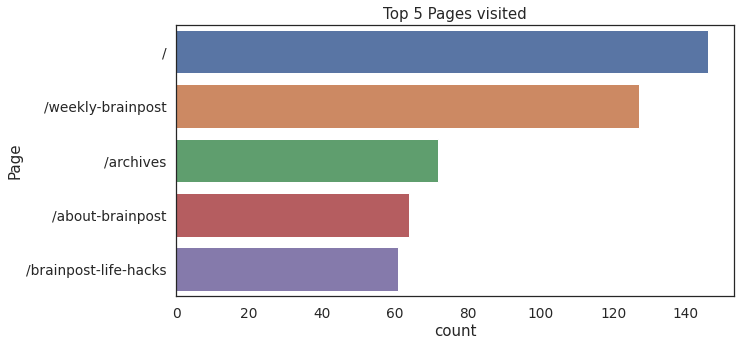

In [ ]:
# https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
# https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

data = df.copy()
data = data[data['Page_count'] >= 60]

plt.figure(figsize=(10, 5))
sns.set(font_scale=1.25)
sns.set_style("white")
title = 'Top 5 Pages visited'
sns.countplot(y = data['Page'], 
                   order = data['Page'].value_counts().index)
plt.title(title)
plt.ioff()

**Figure: Top 5 pages visited all time**

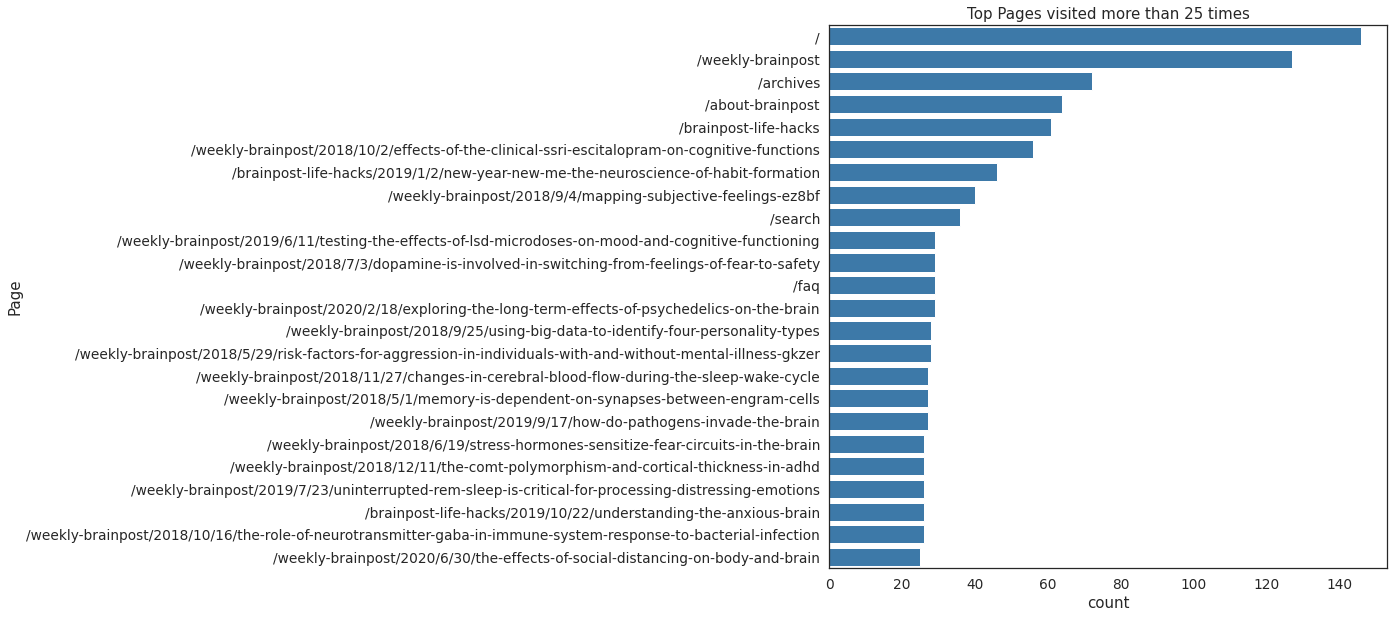

In [ ]:
data = df.copy()
data = data[data['Page_count'] >= 25]

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.set_style("white")
title = 'Top Pages visited more than 25 times'
sns.countplot(y = data['Page'], 
                   order = data['Page'].value_counts().index,
              color='#2b7bba')
plt.title(title)
plt.ioff()

**Figure: Top pages visited at least 25 times**

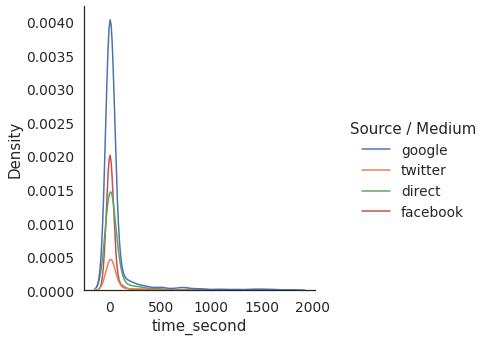

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/

data = df.copy()
data = data[(data['Source_count'] >= 270)]

sns.displot(data, x="time_second", kind="kde", hue='Source / Medium')
plt.ioff()

**Figure: Average time spent on page for the top sources**

The 0 second trafic is not restricted to google.

See this [discussion](https://support.google.com/google-ads/thread/1455669?hl=en) related to 0 second visits on Google Analytics.

The issue seems related to bounce rate preventing Google Analytic to accuralely measure the time spent on the page.


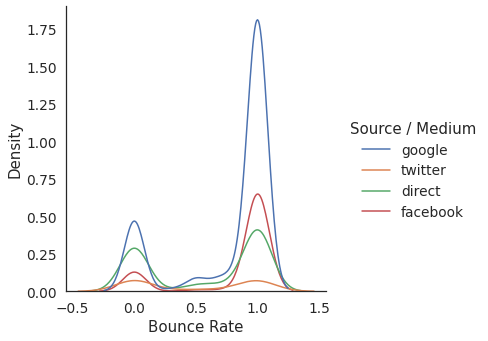

In [ ]:
# Time spend on page

# https://www.statology.org/pandas-filter-multiple-conditions/
data = df.copy()
data = data[(data['Source_count'] >= 270)]

sns.set(font_scale=1.25)
sns.set_style("white")

sns.displot(data, x="Bounce Rate", kind="kde", hue='Source / Medium')
plt.ioff()

**Figure: Average Bounce Rate on page for the top sources**

The bounce rate correspond to users that take no other action after landing on the site such as visiting another page. 
From the figure above this seems to be frequent on the blog which make sense if the user are interested in a particular article.

It also potentially means that for most traffic on the site the average time spend on a page can't be calculated.

There seems to be way to work around this as seen in this [discussion](https://support.google.com/google-ads/thread/1455669?hl=en).

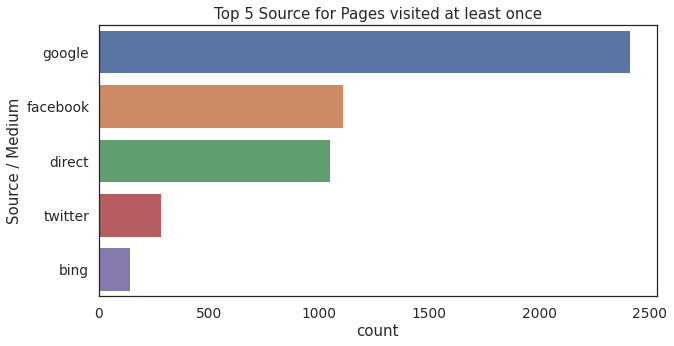

In [ ]:
data = df.copy()
data = data[data['Source_count'] >= 100]

plt.figure(figsize=(10, 5))
sns.set(font_scale=1.25)
sns.set_style("white")

title = 'Top 5 Source for Pages visited more than 100 time'
sns.countplot(y = data['Source / Medium'], 
                   order = data['Source / Medium'].value_counts().index)
plt.title(title)
plt.ioff()

**Figure: Top 5 Source for Pages visited more than 100 time**

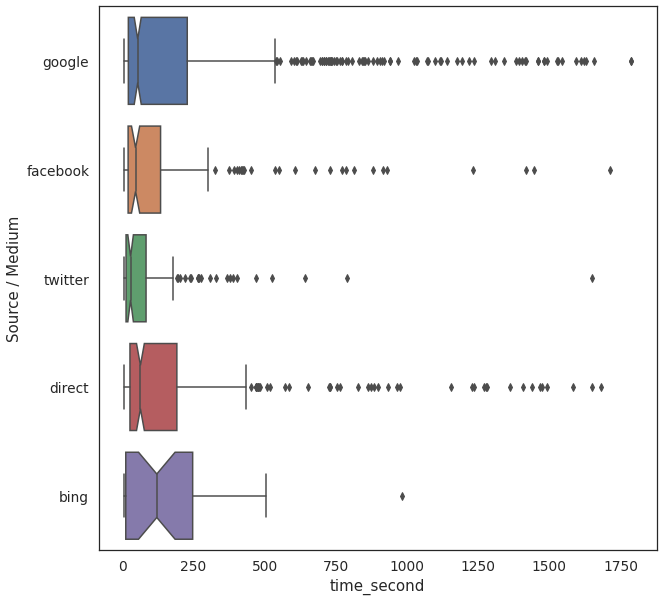

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/

data = df.copy()
data = data[data['Source_count'] >= 100]
data = data[data['time_second'] > 5]

y="Source / Medium"
x="time_second"

title = 'Top 5 Source for Pages visited more than 100 time and viewed more than 5 seconds'

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.boxplot(x=x, y=y, data=data, notch=True, showmeans=False,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})

plt.title(title)
plt.ioff()

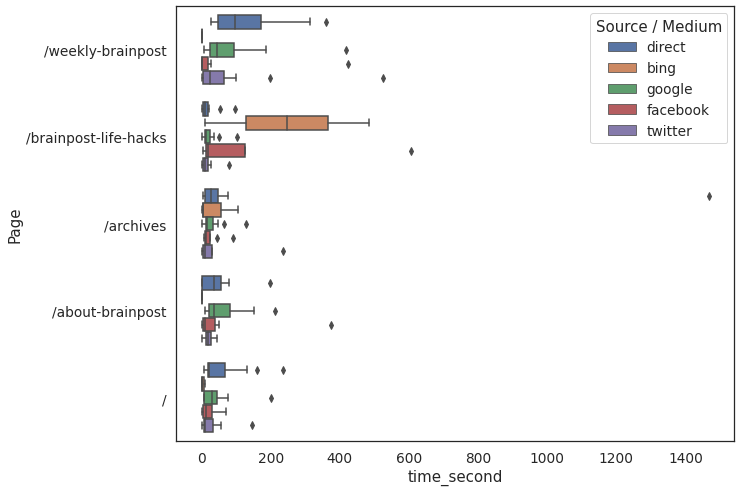

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/

data = df.copy()
data = data[(data['Page_count'] >= 60) & (data['Source_count'] >= 100)]
data = data[data['time_second'] > 5]

title = ""

y="Page"
x="time_second"

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=False,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
            hue='Source / Medium')
plt.title(title)
plt.ioff()

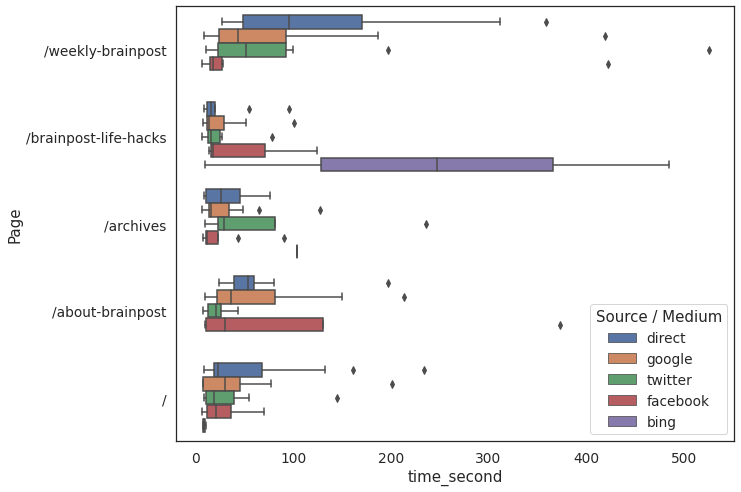

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/

data = df.copy()
data = data[(data['Page_count'] >= 61) & (data['Source_count'] >= 100)]
data = data[data['time_second'] > 5]
data = data[data['time_second'] < 600]

title = ""

y="Page"
x="time_second"

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.25)
sns.set_style("white")

sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=False,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
            hue='Source / Medium')
plt.title(title)
plt.ioff()

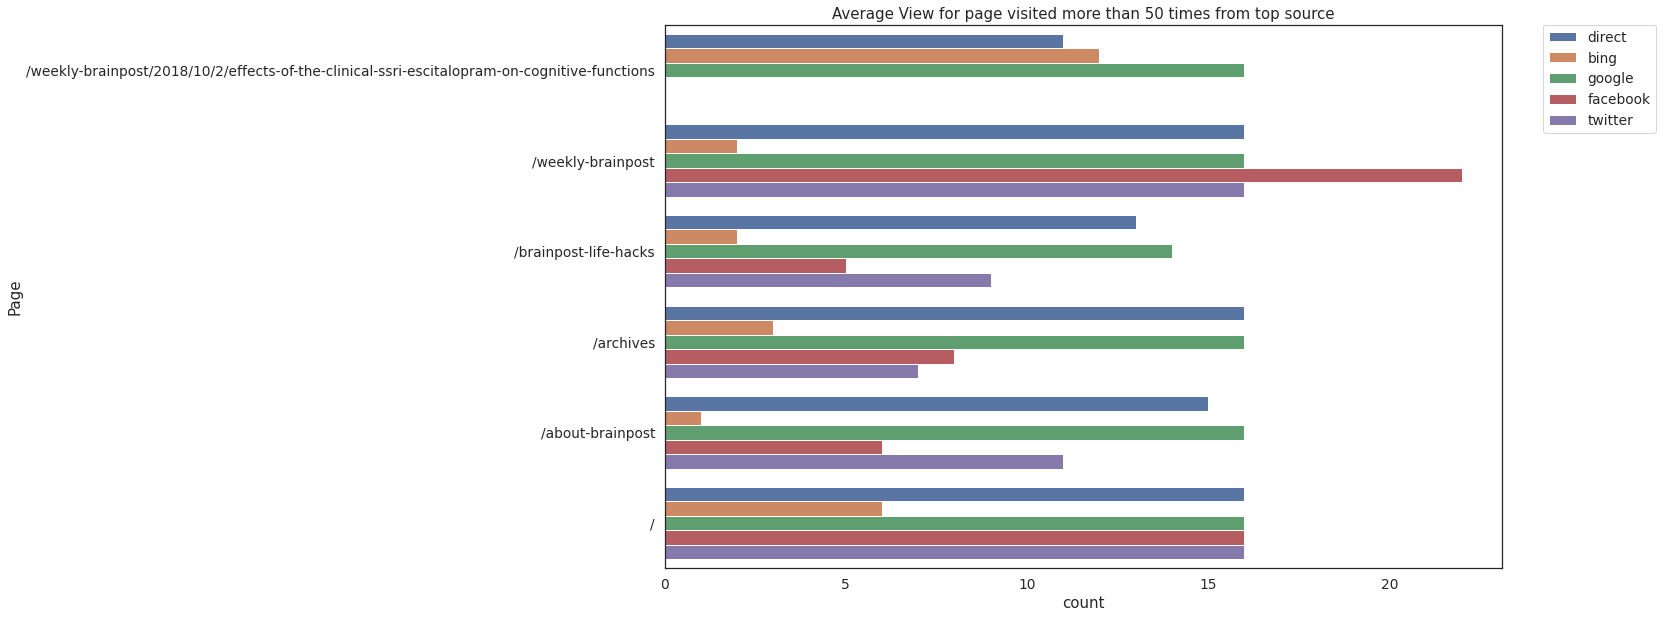

In [ ]:
# https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
# https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

data = df.copy()
data = data[data['Page_count'] >= 50]
data = data[data['Source_count'] >= 100]
#data = data[data['time_second'] > 5]

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.set_style("white")
title = 'Average View for page visited more than 50 times from top source'
sns.countplot(data = data, y = 'Page', hue='Source / Medium')

# Put the legend out of the figure
# https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title(title)
plt.ioff()

# Conclusion

* **What content (or types of content) is most popular (what are patterns we see in popular content) and is different content popular amongst different subgroups (e.g. by source/medium)?**

The homepage, weekly-brainpost, and archive are the most popular pages on the website.
We would need more information to analyze trends in page popularity by sources. The user with direct access, possibly via a mailing list, tend to visit the weekly brain posts pages more. 

* **Any question that will help us to take action to better tailor our content to our audience(s) or understand how traffic comes to the site.**

What is causing the high bounce rate in the analytics?

A large number of visitors are registered as spending 0 seconds on the page. This, combined with the high bounce rate, could indicate an issue in measuring the site traffic. This Google support [page](https://www.brainpost.co/about-brainpost) offers suggestions to solve this problem. 

* **Where are people visiting from (source-wise)?**

Google, Facebook and direct access are the three most common traffic sources. 

# Final remarks
I put this together as a quick and modest analysis. I appreciate real-life projects, so I plan to investigate this further. Any feedback is welcome. 

* E-mail: wguesdon@gmail.com
* Twitter: williamguesdon
* LinkedIn: william-guesdon